In [1]:
import joblib
from matplotlib import pyplot as plt
import cv2

model=joblib.load('brain_tumor_KMeans_model.sav')
tumorLabel=4

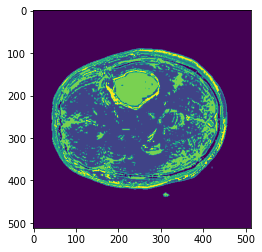

In [2]:
img=cv2.imread('test_images/0 (237).jpg',0)
img_original=cv2.imread('test_images/0 (237).jpg')
height,width=img.shape
imgFlatten=img.reshape(height*width,1)
labels=model.predict(imgFlatten)
labels2D=labels.reshape(height,width)
mask=(labels2D==tumorLabel)
plt.imshow(labels2D)

In [3]:
import numpy as np

array=np.array([2,547,5,7,87,8,5])
print(array==5)

[False False  True False False False  True]


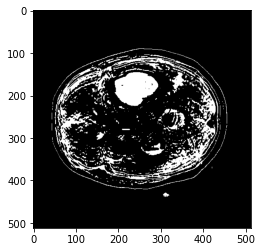

In [4]:
plt.imshow(mask,cmap='gray')

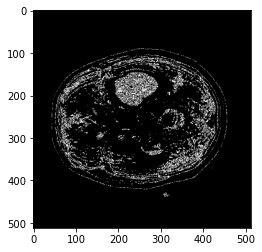

In [6]:

tumorExtracted=np.bitwise_and(mask,img)


plt.imshow(tumorExtracted,cmap='gray')
plt.show()

In [7]:
contours,hierachy=cv2.findContours(tumorExtracted,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
print('no.contours:',len(contours))
###cv2.drawContours(img_original,contours,1423,(0,255,255),2)

for index,cnt in enumerate(contours):
    
    area=cv2.contourArea(cnt)
    #print(area,index)
    
    if(area>1000):
        
        cv2.drawContours(img_original,[cnt],-1,(0,255,255),2)
        x,y,w,h=cv2.boundingRect(cnt)
        cv2.rectangle(img_original,(x,y),(x+w,y+h),(0,255,0),2)
        cv2.rectangle(img_original,(x,y),(x+120,y-40),(0,255,0),-1)
        cv2.putText(img_original,"TUMOR",(x+10,y-10),cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2)
        
cv2.imshow('live',img_original)
cv2.waitKey(0)
cv2.destroyAllWindows()

no.contours: 2586
